In [1]:
# Load all packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create DataFrame
df = pd.read_excel("../Data/Rit.xlsx", sheet_name="rit_hb")
df.columns = ['Datum', 'UurgroepOmschrijving', 'VertrekHalteCode',
       'VertrekHalteNaam', 'VertrekXCoord', 'VertrekYCoord',
       'AankomstHalteCode', 'AankomstHalteNaam', 'AankomstXCoord',
       'AankomstYCoord', 'AantalRitten']

In [3]:
df.head(5)

,Datum,UurgroepOmschrijving,VertrekHalteCode,VertrekHalteNaam,VertrekXCoord,VertrekYCoord,AankomstHalteCode,AankomstHalteNaam,AankomstXCoord,AankomstYCoord,AantalRitten
0,2018-12-24,00:00 - 00:59,0,Overig,0.0,0.000000e+00,0,Overig,0.0,0.000000e+00,80.0
1,2018-12-24,00:00 - 00:59,5046,Rembrandtplein,489627975.0,5.236626e+09,5096,Centraal Station,490049319.0,5.237968e+09,10.0
2,2018-12-24,00:00 - 00:59,5096,Centraal Station,490049319.0,5.237968e+09,0,Overig,0.0,0.000000e+00,10.0
3,2018-12-24,00:00 - 00:59,6063,Leidseplein,488064547.0,5.236476e+09,0,Overig,0.0,0.000000e+00,10.0
4,2018-12-24,01:00 - 01:59,0,Overig,0.0,0.000000e+00,0,Overig,0.0,0.000000e+00,140.0


In [4]:
dfCS = df[df['VertrekHalteNaam'] == "Centraal Station"]
print(set(dfCS["VertrekHalteCode"].tolist()))

{'CS', 5096, 5097, 5100, 5101, 5103, 5104, 5105, 5106, 5011, 5107, 5022}


In [5]:
# Filter DataFrame
# Do not include "Overig" or trips through a stations 
df = df[(df["VertrekHalteNaam"] != "Overig") & (df["AankomstHalteNaam"] != "Overig")]
df = df[df["VertrekHalteNaam"] != df["AankomstHalteNaam"]]

# Remove NaN values
df = df.dropna()

In [6]:
s1 = df['VertrekHalteCode'].tolist()
s2 = df['AankomstHalteCode'].tolist()

stations = set(s1 + s2)

In [7]:
from collections import defaultdict
pos = defaultdict()

vertrekhaltes = df["VertrekHalteCode"].tolist()
vertrekx = df["VertrekXCoord"].tolist()
vertreky = df["VertrekYCoord"].tolist()

for i in range(len(vertrekhaltes)):
    pos[vertrekhaltes[i]] = (vertrekx[i], vertreky[i])
    
aankomsthaltes = df["AankomstHalteCode"].tolist()
aankomstx = df["AankomstXCoord"].tolist()
aankomsty = df["AankomstYCoord"].tolist()

for i in range(len(aankomsthaltes)):
    pos[aankomsthaltes[i]] = (aankomstx[i], aankomsty[i])

In [8]:
pos[5046]

(489627975.0, 5236625897.0)

In [9]:
G = nx.Graph()

for station in stations:
    # Voeg alle stations als nodes toe met exacte coordinaten.
    G.add_node(station)

# pos = {city:(lon, lat) for city, (lat, lon) in nx.get_node_attributes(G, 'pos').items()}

In [10]:
# Create graph from DataFrame
# G = nx.from_pandas_edgelist(df, "VertrekHalteCode", "AankomstHalteCode", "AantalRitten")
G.to_directed()

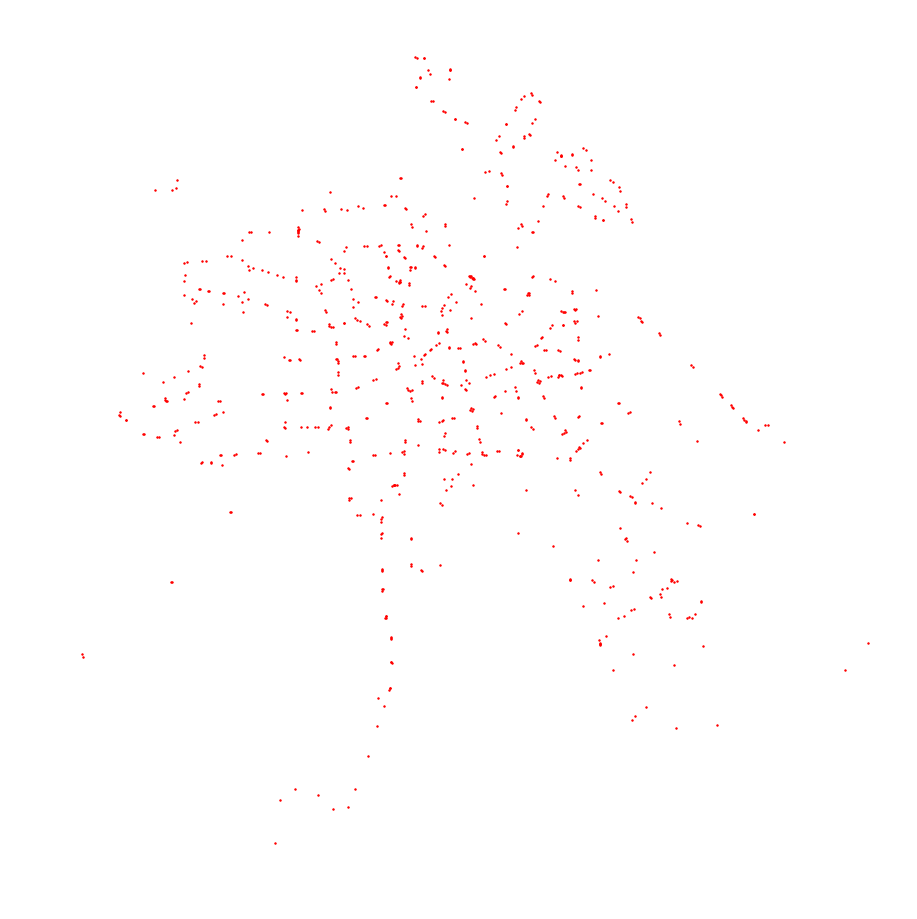

In [11]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos, node_size=2)
plt.show()

In [2]:
G = nx.MultiDiGraph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I"])
G.add_edges_from([("A","B", {"color":"blue"}), ("B", "A"), ("A", "H"), ("H", "A"), ("H", "G"), ("G", "H"),
                 ("G", "D"), ("D", "G"), ("D", "E"), ("E", "D"), ("E", "F"), ("F", "E"),
                 ("C", "I"), ("I", "C"), ("B", "C"), ("C", "B"), ("B", "D"), ("D", "B"),
                 ("D", "C"), ("C", "D"), ("C", "E"), ("E", "C")])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

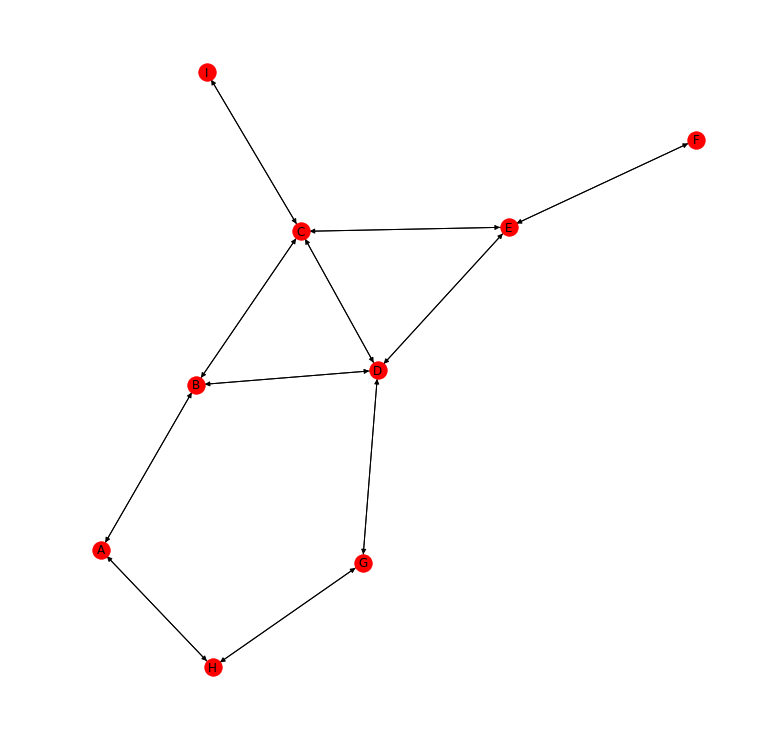

In [5]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)
plt.show()